# The SETI Ellipsoid

Let's code up the echo [ellipsoid](https://en.wikipedia.org/wiki/Ellipsoid) that expands with time for an event

This is based on the excellent presentation in [Lemarchand (1994)](https://ui.adsabs.harvard.edu/abs/1994Ap%26SS.214..209L/) discussing SETI based on SN 1987A, but the concept is identical to the light echo mapping used to study dust structure around SN 1987A (e.g. [this talk](https://cxc.harvard.edu/cdo/snr09/pres/Rest_Armin.pdf) by A. Rest), first [illustrated by Couderc (1939)](https://ui.adsabs.harvard.edu/abs/2007ASPC..363..121S/)

<hr>

*daen* - Japanese for ellipse. Chosen as the repo name because it is short, and avoids acronyms or puns.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

(-10, 10)

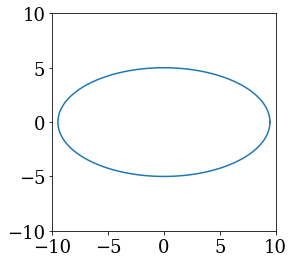

In [12]:
# normal parametric equation for an ellipse
a = 9.5
b = 5

theta = np.linspace(0, 2*np.pi, 1000) # the angle about the origin

x = a * np.cos(theta)
y = b * np.sin(theta)

plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.xlim(-10,10)
plt.ylim(-10,10)

97891.47099050037 49421.55493996495 84500.0


(-100000.0, 100000.0)

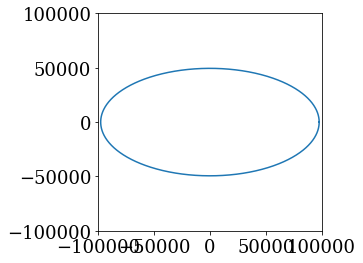

In [19]:
# Eqn 2 of Lemachard'94 defines the semi-axes of the ellipse in terms of time 
# and the distance from Earth to the SNe

R0 = 169000 # distance to the SNe event
c = R0/2
t = 24951 # years since SN explosion, used in Fig 1 of Lemachard'94

a = 0.5 * (t + np.sqrt(t**2 + 4 * (c**2)))
b = np.sqrt(0.5 * (t**2 + np.sqrt(t**4 + 4 * t**2 * c**2)))

print(a,b,c) # note, these numbers don't match their printed values... hm

x = a * np.cos(theta)
y = b * np.sin(theta)

plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.xlim(-1e5,1e5)
plt.ylim(-1e5,1e5)

(-100000.0, 100000.0)

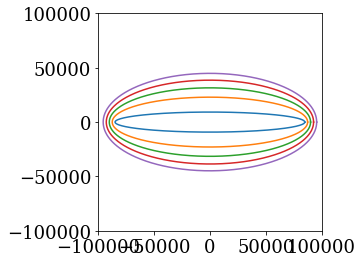

In [26]:
# we can grow the ellipse with time (assuming these Eqns are correct... need to derive myself!)
plt.figure(figsize=(4,4))

for k in range(5):
    t = 1000 + k*5000

    a = 0.5 * (t + np.sqrt(t**2 + 4 * (c**2)))
    b = np.sqrt(0.5 * (t**2 + np.sqrt(t**4 + 4 * t**2 * c**2)))

    x = a * np.cos(theta)
    y = b * np.sin(theta)

    plt.plot(x,y)
    
plt.xlim(-1e5,1e5)
plt.ylim(-1e5,1e5)

In [57]:
def echoxy0(t, c, Ntheta=1000):

    a = 0.5 * (t + np.sqrt(t**2 + 4 * (c**2)))
    b = np.sqrt(0.5 * (t**2 + np.sqrt(t**4 + 4 * t**2 * c**2)))

    theta = np.arange(0, 2*np.pi, 2*np.pi / Ntheta) # the angle about the origin

    x = a * np.cos(theta)
    y = b * np.sin(theta)
    
    return x,y


(-12, 12)

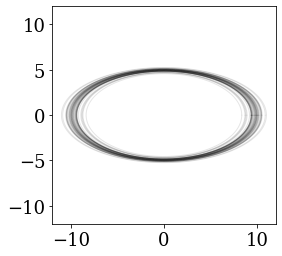

In [69]:
# or we can sample using very simple gaussian uncertainties

Nsp = 50

R0 = 169000 # distance to the SNe event
dR0 = 10450 # distance error I guess, 6%

c = R0/2
dc = dR0/2

t = 25000 
dt = 0.5 # assume event was 6-mo long, use as uncertainty


plt.figure(figsize=(4,4))

for k in range(Nsp):
    x,y = echoxy0(np.random.normal(loc=t, scale=dt), np.random.normal(loc=c, scale=dc))
    plt.plot(x/1e4,y/1e4, c='k', alpha=0.1,lw=1)
    
plt.xlim(-12,12)
plt.ylim(-12,12)